For the importing of data it is required to download the data from here (https://drive.google.com/drive/u/7/folders/1HeNgQRrcjJz_Q53LFO7H_00NNCe1QXnN) and put the two files into the same directory as this notebook.

Suggestions on how to improve this so you can just have the files downloaded straight from google drive are welcome.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import os

In [19]:
training = pd.read_csv("training.csv")
test = pd.read_csv("validation.csv")

In [8]:
training.head()
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947824 entries, 0 to 1947823
Data columns (total 6 columns):
lat      float64
lon      float64
CDD      float64
CWD      float64
CFD      float64
Yield    float64
dtypes: float64(6)
memory usage: 89.2 MB


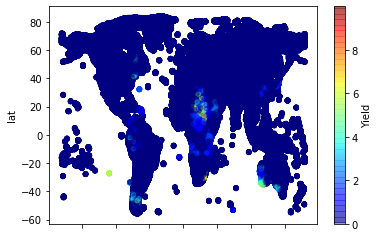

In [13]:
training.plot(kind="scatter", x="lon", y="lat", alpha =0.4,
             c="Yield", cmap=plt.get_cmap("jet"), colorbar=True)


In [50]:
training = training[training["Yield"] != 0.0] #dropping rows where yield is zero, assuming no farming happens there
test = test[test["Yield"] != 0.0]

X_train = training.copy().drop(["Yield"],axis=1)
Y_train = training.copy()["Yield"]
X_test = test.copy().drop(["Yield"],axis=1)
Y_test = test.copy()["Yield"]

X_column_names = X_train.columns.values.tolist()


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105318 entries, 20 to 1947816
Data columns (total 5 columns):
lat    105318 non-null float64
lon    105318 non-null float64
CDD    105318 non-null float64
CWD    105318 non-null float64
CFD    105318 non-null float64
dtypes: float64(5)
memory usage: 4.8 MB


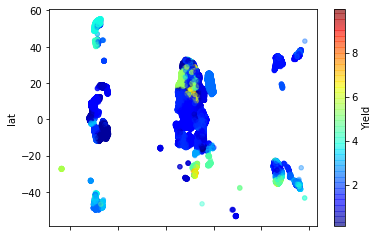

In [8]:
training.plot(kind="scatter", x="lon", y="lat", alpha =0.4,
             c="Yield", cmap=plt.get_cmap("jet"), colorbar=True)

In [10]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1,oob_score=True)
rnd_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

### With zero yields dropped (assuming no farming is going on there) ###

In [22]:
rnd_reg.score(X_train, Y_train)

0.995937897906638

We are able to at least fit to the training set

In [23]:
rnd_reg.oob_score_

0.9700363381370167

In [24]:
rnd_reg.score(X_test, Y_test)

0.9660036395368687

The scores (R^2) values are very high for the oob and test!

In [14]:
for name, score in zip(X_column_names, rnd_reg.feature_importances_):
    print(name,score)

lat 0.31759351445240297
lon 0.4414724990141799
CDD 0.037247799508507255
CWD 0.19700108049647666
CFD 0.006685106528433252


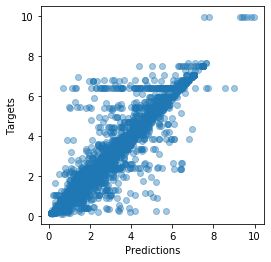

In [25]:
pred = rnd_reg.predict(X_test)

fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(pred,Y_test, alpha =0.4)
ax.set(xlabel = 'Predictions', ylabel = 'Targets')
plt.show()

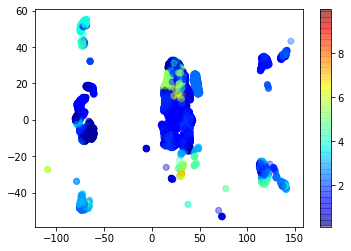

In [35]:
fig, ax = plt.subplots()
sc = plt.scatter( x=X_test["lon"], y=X_test["lat"], alpha =0.4,c=Y_test,cmap=plt.get_cmap("jet"))
plt.colorbar(sc)
           

### How about if we drop the lat and long? ###

The lat and long could just be proxies for underlying features such as temp (e.g. near equator you would get higher average temps). Maybe should include temp/solar radiation instead of lat and long, to pick up changes in temp in the future (lat and long wouldn't pick that up).

In [52]:
X_train = X_train.copy().drop(["lat"],axis=1).drop(["lon"],axis=1)
X_test= X_test.copy().drop(["lat"],axis=1).drop(["lon"],axis=1)
X_column_names = X_train.columns.values.tolist()


In [43]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1,oob_score=True)
rnd_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
rnd_reg.score(X_train, Y_train)

0.7215188306441231

In [44]:
rnd_reg.oob_score_

0.7140294907654436

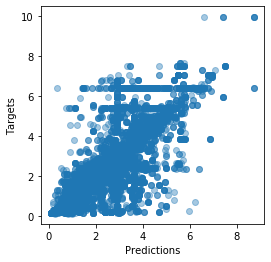

In [46]:
pred = rnd_reg.predict(X_test)

fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(pred,Y_test, alpha =0.4)
ax.set(xlabel = 'Predictions', ylabel = 'Targets')
plt.show()

In [53]:
for name, score in zip(X_column_names, rnd_reg.feature_importances_):
    print(name,score)

CDD 0.43695905830437365
CWD 0.49306754888466575
CFD 0.06997339281096061


### With zero yields included ###

Random Forest unable to fit the training set, even with unlimited max_depth and no attempts at regularisation

In [34]:
rnd_reg.score(X_train, Y_train)

0.4029792759894547

So of course, poor out-of-bag scores and poor score on validation set

In [30]:
rnd_reg.oob_score_

0.40210721566433905

In [33]:
rnd_reg.score(X_test, Y_test)

0.4029792759894547

In [39]:
for name, score in zip(X_column_names, rnd_reg.feature_importances_):
    print(name,score)

lat 0.37772742906969003
lon 0.41106693642759057
CDD 0.014676663206270703
CWD 0.19652897129644875
CFD 0.0
